# Clasificación de Sentimientos en Reseñas de Películas
Procesamiento del Lenguaje Natural - IEBS
Paula Miranda Ceron

---

## Fase 1: Carga y Prepocesamiento de Datos
**Objetivo**  
En esta sección se carga el dataset movie_reviews de NLTK y se realiza un preprocesamiento exhaustivo del texto.  

Esto incluye:  
**Objetivo**  
- Conversión a minúsculas  
- Eliminación de puntuación  
- Eliminación de stopwords  
- Tokenización  

In [43]:
# Importación de librerías

# Manipulación de datos
import numpy as np
import pandas as pd
import random
import string

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Procesamiento de lenguaje natural
import nltk
from nltk.corpus import movie_reviews, stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from collections import Counter

In [2]:
# Descarga de dataset y recursos NLTK
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/paumc/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /Users/paumc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/paumc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/paumc/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Carga del dataset movie_reviews de NLTK

# Carga del dataset
reviews = [(movie_reviews.raw(fileid), category) 
           for category in movie_reviews.categories() 
           for fileid in movie_reviews.fileids(category)]
print(f"Ejemplo review: {reviews[0][:300]}")
print(f"Total de reseñas cargadas: {len(reviews)}")

# Cargar las stopwords en inglés para filtrarlas luego en el preprocesamiento
stop_words = set(stopwords.words('english'))
print(f"Ejemplo stopwords: {list(stop_words)[:10]}")

Ejemplo review: ('plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as 

In [4]:
# Función de preprocesamiento de reseñas
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [5]:
# Preprocesamos las reviews

# Separamos textos y etiquetas, y aplicamos la función
texts, labels = zip(*reviews)
texts = [preprocess_text(text) for text in texts]
print("Ejemplo review preprocesada:")
print(texts[0][:300])

Ejemplo review preprocesada:
plot two teen couples go church party drink drive get accident one guys dies girlfriend continues see life nightmares whats deal watch movie sorta find critique mindfuck movie teen generation touches cool idea presents bad package makes review even harder one write since generally applaud films atte


## Fase 2: Entrenamiento de modelos de clasificación
**Objetivo**  
- Vectorización: Transformar los textos en vectores numéricos con CountVectorizer  
- Dividir los datos en entrenamiento y prueba  
- Entrenamiento y evaluación del modelo Naive Bayes  
- Modelo simple de Red Neuronal usando Keras

In [6]:
# Vectorización y división del dataset

# Dividir los datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.3, random_state=42)

# Vectorización con CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

### Modelo 1: Naive Bayes

In [7]:
# Creamos el modelo Naive Bayes
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Predicciones
y_pred = model.predict(X_test_vec)

# Evaluación
print("Resultados - Modelo Naive Bayes:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Resultados - Modelo Naive Bayes:
Accuracy: 0.8117

Classification Report:
              precision    recall  f1-score   support

         neg       0.80      0.84      0.82       302
         pos       0.83      0.79      0.81       298

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



El modelo clásico de Naive Bayes ha obtenido un **accuracy de 0.8117**, mostrando un rendimiento muy sólido en la tarea de clasificación de sentimientos:

- La precisión y recall están bien equilibradas para ambas clases, con un f1-score general de 0.81.
- El modelo muestra un rendimiento notable para un algoritmo clásico.
- En tareas de PLN con textos simples y cortos, los enfoques estadísticos como Naive Bayes siguen siendo competitivos y eficientes, con tiempos de entrenamiento mínimos y resultados estables.

Este modelo se usará como referencia base en la comparación final de modelos en la Fase 3.

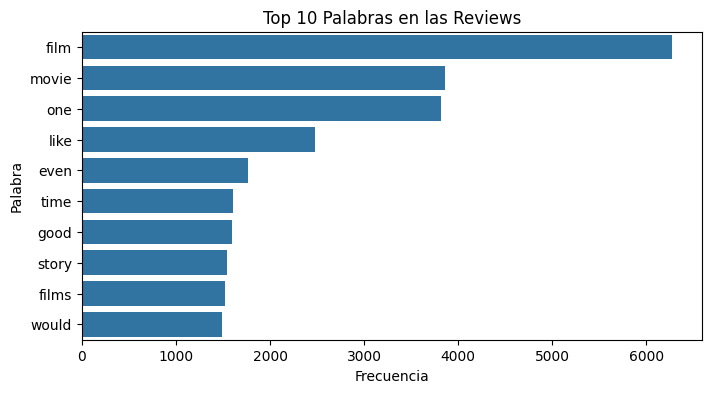

In [8]:
# Visualización

# Sumamos las frecuencias de cada palabra en todo el conjunto de entrenamiento
sum_words = np.asarray(X_train_vec.sum(axis=0)).flatten()
words = vectorizer.get_feature_names_out()

# Emparejamos cada palabra con su frecuencia total
word_freq = [(word, sum_words[idx]) for idx, word in enumerate(words)]
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Seleccionamos las 10 más frecuentes
top_words = np.array(word_freq[:10])

# Gráfico de barras
plt.figure(figsize=(8, 4))
sns.barplot(x=top_words[:, 1].astype(int), y=top_words[:, 0])
plt.title('Top 10 Palabras en las Reviews')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.show()

### Modelo 2: Red Neuronal Simple con Keras

**Objetivo**  
Crear una red neuronal simple usando Keras. Se utilizará una capa de Embedding seguida de GlobalAveragePooling1D y una capa densa con activación sigmoid para clasificación binaria.

In [17]:
# Parámetros
vocab_size = 10000
embedding_dim = 32
max_length = 200

# Arquitectura del modelo mejorado
model_keras = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compilación
model_keras.compile(loss='binary_crossentropy',
                    optimizer=Adam(learning_rate=0.001),
                    metrics=['accuracy'])

# Entrenamiento
y_train_bin = np.array(y_train_bin)
y_test_bin = np.array(y_test_bin)
history = model_keras.fit(X_train_pad, y_train_bin,
                          epochs=10,
                          batch_size=32,
                          validation_data=(X_test_pad, y_test_bin),
                          verbose=2)

Epoch 1/10
44/44 - 5s - 112ms/step - accuracy: 0.5043 - loss: 0.6946 - val_accuracy: 0.5183 - val_loss: 0.7007
Epoch 2/10
44/44 - 1s - 18ms/step - accuracy: 0.8257 - loss: 0.5501 - val_accuracy: 0.5067 - val_loss: 0.7113
Epoch 3/10
44/44 - 1s - 17ms/step - accuracy: 0.9600 - loss: 0.1692 - val_accuracy: 0.5600 - val_loss: 0.7813
Epoch 4/10
44/44 - 1s - 20ms/step - accuracy: 1.0000 - loss: 0.0092 - val_accuracy: 0.5733 - val_loss: 0.8383
Epoch 5/10
44/44 - 1s - 22ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.5767 - val_loss: 0.8755
Epoch 6/10
44/44 - 1s - 17ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.5750 - val_loss: 0.8871
Epoch 7/10
44/44 - 1s - 20ms/step - accuracy: 1.0000 - loss: 0.0023 - val_accuracy: 0.5617 - val_loss: 1.0089
Epoch 8/10
44/44 - 1s - 19ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.5700 - val_loss: 0.9329
Epoch 9/10
44/44 - 1s - 17ms/step - accuracy: 1.0000 - loss: 8.8385e-04 - val_accuracy: 0.5750 - val_loss: 0.9524
Epoch

In [18]:
# Predicciones
y_pred_prob = model_keras.predict(X_test_pad)
y_pred_keras = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [19]:
# Evaluaciones
print("Resultados - Modelo Red Neuronal Mejorado (Keras):")
print(f"Accuracy: {accuracy_score(y_test_bin, y_pred_keras):.4f}\n")
print("Classification Report:")
print(classification_report(y_test_bin, y_pred_keras))

Resultados - Modelo Red Neuronal Mejorado (Keras):
Accuracy: 0.5733

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.58      0.58       302
           1       0.57      0.57      0.57       298

    accuracy                           0.57       600
   macro avg       0.57      0.57      0.57       600
weighted avg       0.57      0.57      0.57       600



Con estos resultados podemos decir:
- Precision y recall equilibrados (~0.57–0.58) para ambas clases (pos y neg).  
- Macro y weighted avg muy similares, indicando un dataset balanceado.  
- El modelo no está sesgado hacia una clase, pero su rendimiento global es modesto.  

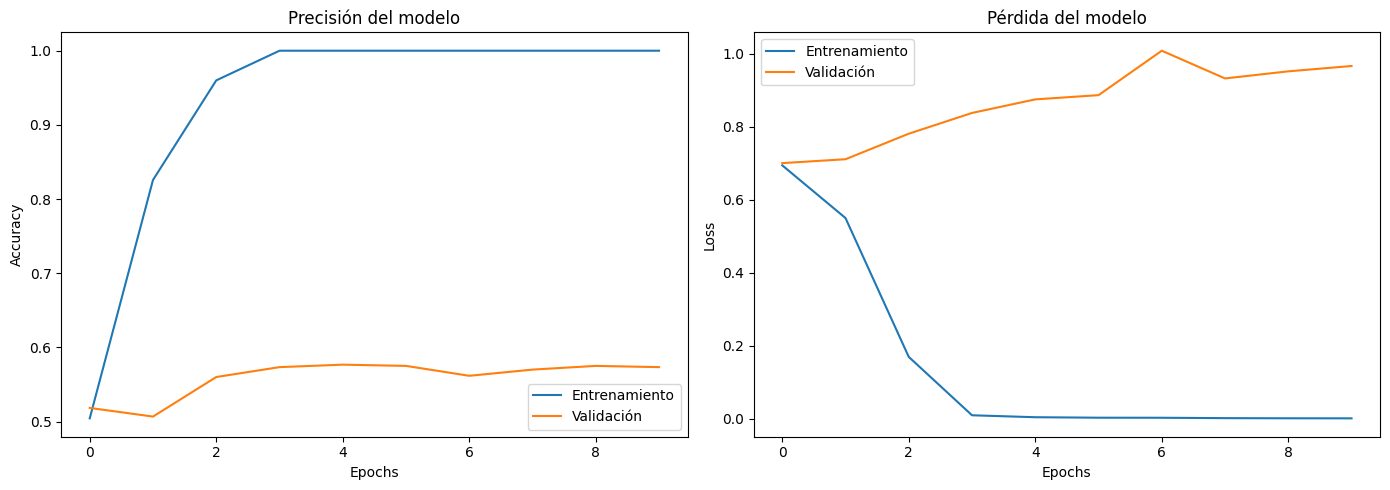

In [20]:
# Curvas de precisión y pérdida
plt.figure(figsize=(14,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Según estas curvas podemos observar sobreajuste (overfitting) severo:  
	•	Accuracy de entrenamiento: casi 1.0 (perfecto).  
	•	Accuracy de validación: estancada en ~0.55.  
	•	Pérdida de validación sube después de epoch 2–3.  

Esto indica que el modelo memoriza el entrenamiento pero no generaliza, típico de redes con demasiada capacidad frente a pocos datos

A pesar de que el modelo entrena correctamente y no genera errores técnicos, **su capacidad de generalización es limitada**. Este tipo de sobreajuste es habitual en arquitecturas con:
- Exceso de parámetros (por ejemplo, el uso de Flatten en lugar de Pooling).
- Pocas restricciones (poca regularización o dropout insuficiente).
- Entrenamiento prolongado sin EarlyStopping.

Por ello, se ha decidido plantear una **versión alternativa mejorada** en la siguiente celda, que incorpora regularización y técnicas de parada temprana.

### Modelo 3: Red Neuronal regularizada con EarlyStopping
**Objetivo**  
	•	Sustituimos Flatten() por GlobalAveragePooling1D.  
	•	Añadimos EarlyStopping para evitar sobreentrenar.  
	•	Mantenemos un tamaño de Embedding moderado.  
	•	Añadimos Dropout para reducir overfitting.  

In [23]:
# Red neuronal regularizada
model_keras_v2 = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    GlobalAveragePooling1D(),
    Dense(32, activation='relu'),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

# Compilación
model_keras_v2.compile(loss='binary_crossentropy',
                       optimizer=Adam(learning_rate=0.001),
                       metrics=['accuracy'])

# EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entrenamiento
history_v2 = model_keras_v2.fit(X_train_pad, y_train_bin,
                                epochs=20,
                                batch_size=32,
                                validation_data=(X_test_pad, y_test_bin),
                                callbacks=[early_stop],
                                verbose=2)

Epoch 1/20
44/44 - 3s - 62ms/step - accuracy: 0.5100 - loss: 0.6933 - val_accuracy: 0.5117 - val_loss: 0.6920
Epoch 2/20
44/44 - 1s - 18ms/step - accuracy: 0.5864 - loss: 0.6872 - val_accuracy: 0.6300 - val_loss: 0.6881
Epoch 3/20
44/44 - 1s - 17ms/step - accuracy: 0.6914 - loss: 0.6671 - val_accuracy: 0.6950 - val_loss: 0.6663
Epoch 4/20
44/44 - 1s - 17ms/step - accuracy: 0.8100 - loss: 0.5840 - val_accuracy: 0.7667 - val_loss: 0.5892
Epoch 5/20
44/44 - 1s - 17ms/step - accuracy: 0.9186 - loss: 0.3772 - val_accuracy: 0.7550 - val_loss: 0.5178
Epoch 6/20
44/44 - 1s - 19ms/step - accuracy: 0.9579 - loss: 0.2000 - val_accuracy: 0.7700 - val_loss: 0.5120
Epoch 7/20
44/44 - 1s - 17ms/step - accuracy: 0.9857 - loss: 0.0935 - val_accuracy: 0.7650 - val_loss: 0.5298
Epoch 8/20
44/44 - 1s - 17ms/step - accuracy: 0.9936 - loss: 0.0571 - val_accuracy: 0.7617 - val_loss: 0.5709
Epoch 9/20
44/44 - 1s - 17ms/step - accuracy: 0.9971 - loss: 0.0355 - val_accuracy: 0.7700 - val_loss: 0.6317


In [24]:
# Predicciones
y_pred_prob_v2 = model_keras_v2.predict(X_test_pad)
y_pred_keras_v2 = [1 if prob > 0.5 else 0 for prob in y_pred_prob_v2]

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [25]:
# Evaluación
print("Resultados - Modelo Red Neuronal Regularizada:")
print(f"Accuracy: {accuracy_score(y_test_bin, y_pred_keras_v2):.4f}\n")
print("Classification Report:")
print(classification_report(y_test_bin, y_pred_keras_v2))

Resultados - Modelo Red Neuronal Regularizada:
Accuracy: 0.7700

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.69      0.75       302
           1       0.73      0.85      0.79       298

    accuracy                           0.77       600
   macro avg       0.78      0.77      0.77       600
weighted avg       0.78      0.77      0.77       600



Aunque el modelo regularizado con Keras no ha superado al Naive Bayes en accuracy general (0.77 frente a 0.81), sí ha mostrado un comportamiento diferenciado en cuanto al balance entre precisión y sensibilidad.

Detecta mejor las reseñas positivas: con un recall del 85% en la clase positiva, el modelo Keras v2 es especialmente eficaz en contextos donde identificar correctamente las opiniones favorables es prioritario (por ejemplo, en sistemas de recomendación o análisis de satisfacción).

En definitiva, el modelo Keras v2 presenta una alternativa moderna y competitiva al enfoque clásico, especialmente cuando se busca alta sensibilidad en una de las clases. Su rendimiento será comparado detalladamente con el modelo Naive Bayes en la próxima fase, evaluando no solo las métricas, sino también la interpretabilidad y el coste computacional.

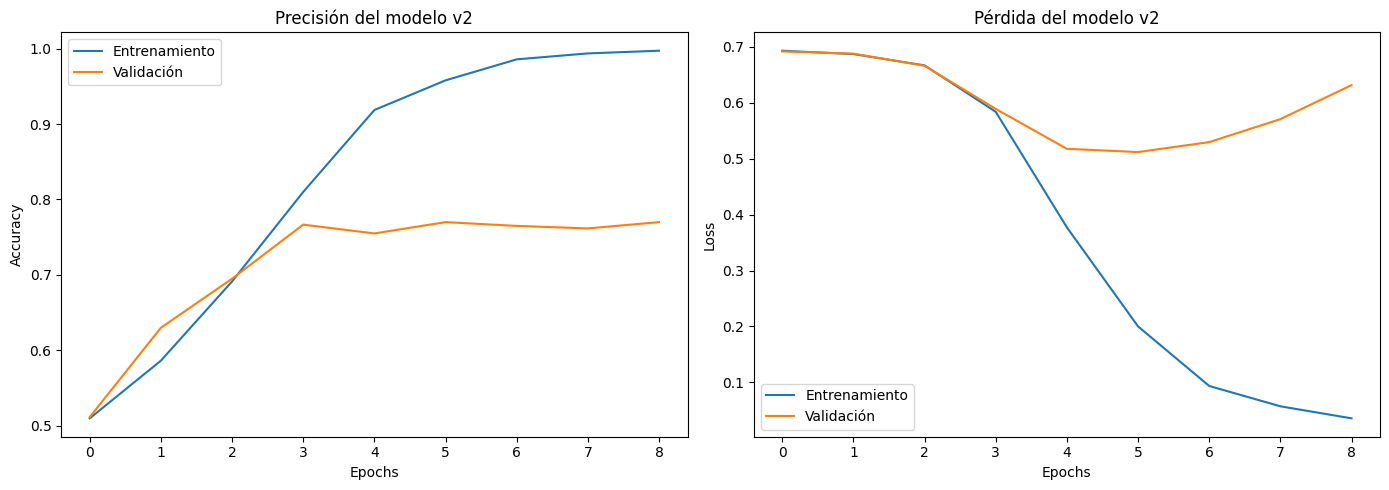

In [26]:
# Curvas de precisión y pérdida (modelo Keras v2 regularizado)
plt.figure(figsize=(14,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history_v2.history['accuracy'], label='Entrenamiento')
plt.plot(history_v2.history['val_accuracy'], label='Validación')
plt.title('Precisión del modelo v2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history_v2.history['loss'], label='Entrenamiento')
plt.plot(history_v2.history['val_loss'], label='Validación')
plt.title('Pérdida del modelo v2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Las curvas de precisión y pérdida del modelo v2 muestran una **mejora clara en la generalización** en comparación con la versión anterior:

- La precisión de validación sube progresivamente durante los primeros epochs y se estabiliza sin caer drásticamente, señal de que el modelo está aprendiendo patrones útiles.
- La pérdida de validación disminuye hasta el epoch 5–6 y luego comienza a subir ligeramente, momento en el que EarlyStopping detuvo el entrenamiento.
- La diferencia entre las curvas de entrenamiento y validación sigue existiendo, pero es mucho menor que en el modelo anterior, lo que indica una reducción efectiva del sobreajuste.

Las modificaciones aplicadas:
- Reemplazo de Flatten por GlobalAveragePooling1D
- Añadido de Dropout (0.4)
- Implementación de EarlyStopping

han resultado en un modelo más **estable y generalizable**, con mejor capacidad para predecir correctamente en el conjunto de test.

Este modelo se utilizará en la Fase 3 para comparar su rendimiento frente al enfoque clásico de **Naive Bayes**.

## Fase 3: Evaluación y comparación de modelos
**Objetivo**  
En esta sección se comparan los dos enfoques aplicados al problema de clasificación de sentimientos en reviews de películas:  
- Un modelo clásico: **Naive Bayes** con CountVectorizer.  
- Un modelo moderno: **Red Neuronal Simple** usando Keras, con Embedding, GlobalAveragePooling1D, capas Dense y regularización.  
  
Ambos modelos serán evaluados mediante:
- Métricas estándar: precisión, recall, f1-score y accuracy.  

#### Comparación tabular

In [32]:
# Comparación métrica de ambos modelos
def resumen_metricas(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, pos_label='pos'),
        "Recall": recall_score(y_true, y_pred, pos_label='pos'),
        "F1-score": f1_score(y_true, y_pred, pos_label='pos')
    }

# Convertir etiquetas a 'pos'/'neg' para consistencia en tabla
y_test_bin_str = ['pos' if y == 1 else 'neg' for y in y_test_bin]
y_pred_keras_v2_str = ['pos' if y == 1 else 'neg' for y in y_pred_keras_v2]

metrics_nb = resumen_metricas(y_test, y_pred)
metrics_keras = resumen_metricas(y_test_bin_str, y_pred_keras_v2_str)

# Mostrar como DataFrame
df_metrics = pd.DataFrame([metrics_nb, metrics_keras], index=['Naive Bayes', 'Keras v2'])
df_metrics = df_metrics.round(4)
df_metrics

,Accuracy,Precision,Recall,F1-score
Naive Bayes,0.8117,0.8269,0.7852,0.8055
Keras v2,0.7700,0.7299,0.8523,0.7864


**Análisis:**

- Naive Bayes obtiene mayor precisión y mejor balance global, destacando en accuracy general (81.17%) y precision (82.69%).
- El modelo Keras v2 logra un recall superior (85.23%), lo que lo convierte en una mejor opción si el objetivo principal es detectar la mayor cantidad posible de reseñas positivas.
- Aunque Naive Bayes muestra un rendimiento global más equilibrado, la red neuronal regularizada tiene un comportamiento competitivo, especialmente en tareas donde minimizar falsos negativos es prioritario.

## Fase 4: Visualización
**Objetivo**  
- Mostrar las palabras más frecuentes en las reseñas positivas y negativas.
- Graficar las métricas de evaluación como curvas ROC y matrices de confusión.

#### Palabras más frecuentes en reviews positivas y negativas

/var/folders/t9/0mcwk_xx15l8r4kj00z90c_40000gn/T/ipykernel_20987/2762002821.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[1] for x in top_pos], y=[x[0] for x in top_pos], palette='Greens_r')
/var/folders/t9/0mcwk_xx15l8r4kj00z90c_40000gn/T/ipykernel_20987/2762002821.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[x[1] for x in top_neg], y=[x[0] for x in top_neg], palette='Reds_r')


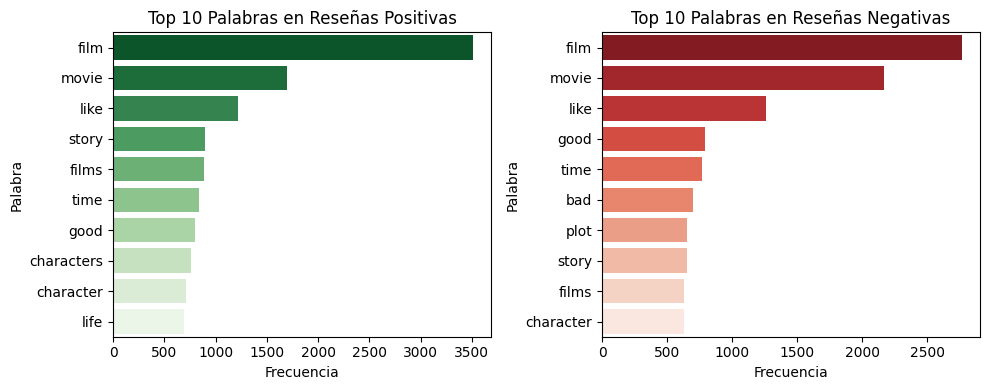

In [47]:
# Separar reseñas positivas y negativas
X_train_pos = [text for text, label in zip(X_train, y_train) if label == 'pos']
X_train_neg = [text for text, label in zip(X_train, y_train) if label == 'neg']

# Vectorizar y contar palabras positivas
vectorizer_pos = CountVectorizer(stop_words='english', max_features=10000)
X_pos_vec = vectorizer_pos.fit_transform(X_train_pos)
sum_words_pos = np.asarray(X_pos_vec.sum(axis=0)).flatten()
words_pos = vectorizer_pos.get_feature_names_out()
freq_pos = [(word, sum_words_pos[i]) for i, word in enumerate(words_pos)]
top_pos = sorted(freq_pos, key=lambda x: x[1], reverse=True)[:10]

# Vectorizar y contar palabras negativas
vectorizer_neg = CountVectorizer(stop_words='english', max_features=10000)
X_neg_vec = vectorizer_neg.fit_transform(X_train_neg)
sum_words_neg = np.asarray(X_neg_vec.sum(axis=0)).flatten()
words_neg = vectorizer_neg.get_feature_names_out()
freq_neg = [(word, sum_words_neg[i]) for i, word in enumerate(words_neg)]
top_neg = sorted(freq_neg, key=lambda x: x[1], reverse=True)[:10]

# Mostrar gráficas
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.barplot(x=[x[1] for x in top_pos], y=[x[0] for x in top_pos], palette='Greens_r')
plt.title('Top 10 Palabras en Reseñas Positivas')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')

plt.subplot(1, 2, 2)
sns.barplot(x=[x[1] for x in top_neg], y=[x[0] for x in top_neg], palette='Reds_r')
plt.title('Top 10 Palabras en Reseñas Negativas')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')

plt.tight_layout()
plt.show()

Se presentan las palabras más frecuentes en las reseñas positivas y negativas del conjunto de entrenamiento, tras el preprocesamiento:

- Tanto en reseñas positivas como negativas predominan términos genéricos como *film*, *movie* y *like*, habituales en cualquier opinión.
- En reseñas **positivas**, destacan palabras como *story*, *characters*, *good* o *life*.
- En reseñas **negativas**, aparecen con más frecuencia *bad* o *plot*, que reflejan insatisfacción.

Este análisis cualitativo complementa la visión cuantitativa de los modelos, y confirma que el lenguaje utilizado varía significativamente entre ambos tipos de reseñas.

#### Matrices de confusión

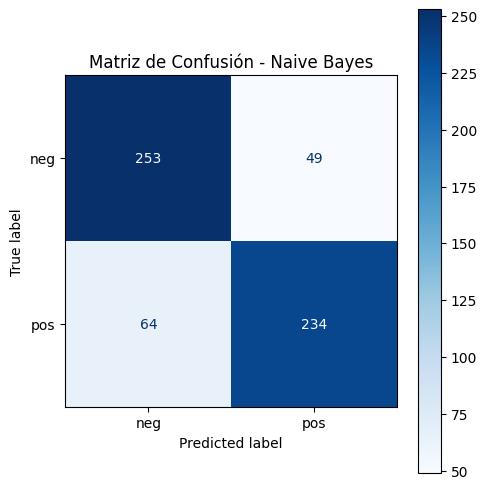

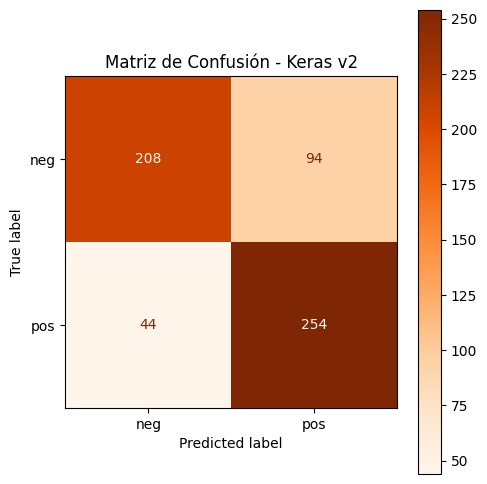

In [39]:
# Matriz Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred, labels=['neg', 'pos'])
fig, ax = plt.subplots(figsize=(5, 5))
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['neg', 'pos'])
disp_nb.plot(cmap='Blues', ax=ax, values_format='d')
ax.set_title("Matriz de Confusión - Naive Bayes")
plt.tight_layout()
plt.show()

# Matriz Keras v2
cm_keras = confusion_matrix(y_test_bin_str, y_pred_keras_v2_str, labels=['neg', 'pos'])
fig, ax = plt.subplots(figsize=(5, 5))
disp_keras = ConfusionMatrixDisplay(confusion_matrix=cm_keras, display_labels=['neg', 'pos'])
disp_keras.plot(cmap='Oranges', ax=ax, values_format='d')
ax.set_title("Matriz de Confusión - Keras v2")
plt.tight_layout()
plt.show()

A continuación se comparan visualmente los errores y aciertos de ambos modelos:

- **Naive Bayes**:
  - Clasifica correctamente 253 reseñas negativas y 234 positivas.
  - Comete **49 falsos positivos** y **64 falsos negativos**.
  - Tiene un rendimiento equilibrado en ambas clases, con mayor precisión en la clase negativa.

- **Keras v2**:
  - Clasifica correctamente 208 reseñas negativas y 254 positivas.
  - Comete **94 falsos positivos** (más errores al detectar negativas).
  - Solo **44 falsos negativos**, lo que confirma su **alto recall en clase positiva**.

**Conclusión**:
- **Naive Bayes** es más conservador: mejor en detectar reseñas negativas.
- **Keras v2** es más sensible a las positivas, lo que puede ser útil en contextos donde es más importante **identificar correctamente las opiniones favorables**.

#### Curvas ROC

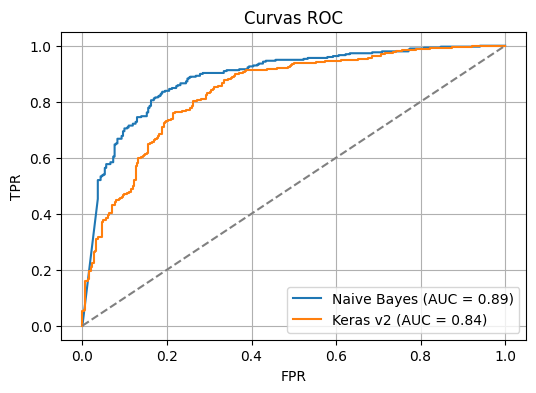

In [42]:
# Naive Bayes: probabilidad para clase 'pos'
y_prob_nb = model.predict_proba(X_test_vec)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve([1 if y=='pos' else 0 for y in y_test], y_prob_nb)
auc_nb = auc(fpr_nb, tpr_nb)

# Keras: ya tienes y_pred_prob_v2
fpr_keras, tpr_keras, _ = roc_curve(y_test_bin, y_pred_prob_v2)
auc_keras = auc(fpr_keras, tpr_keras)

# Plot ROC
plt.figure(figsize=(6, 4))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot(fpr_keras, tpr_keras, label=f'Keras v2 (AUC = {auc_keras:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curvas ROC')
plt.legend()
plt.grid(True)
plt.show()

La curva ROC permite comparar la capacidad de discriminación de los modelos binarios. En este caso:

- **Naive Bayes** presenta un AUC de **0.89**, lo que indica una excelente capacidad para distinguir entre reseñas positivas y negativas.
- **Keras v2** obtiene un AUC de **0.84**, también muy sólido, aunque ligeramente inferior.

**Conclusión**:  
Ambos modelos muestran un comportamiento robusto, pero **Naive Bayes destaca en esta métrica**, reforzando su papel como modelo más equilibrado y consistente en esta tarea.

## Fase 5: Artículo en Medium
**Objetivo**  
- Reflexionar sobre el proceso de trabajo, los resultados obtenidos y las lecciones aprendidas.
- Comparar el rendimiento de los modelos utilizados y discutir cómo los enfoques tradicionales 
y las redes neuronales se complementan en tareas de procesamiento de lenguaje natural.
- Resumir lo aprendido durante todo el curso, enfocado en los aspectos más importantes y 
destacando las técnicas más útiles que has aprendido

'Link articulo Medium'

'https://medium.com/@paulamc.data/clasificación-de-sentimientos-en-reseñas-de-películas-naive-bayes-vs-red-neuronal-con-keras-c33c29b24839'